In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('Data.csv')

In [3]:
X=df.drop('Bankruptcy',axis='columns')
y=df['Bankruptcy']

In [4]:
from imblearn.over_sampling import SMOTE

In [5]:
smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm = smote.fit_resample(X,y)
y_sm.value_counts()

1    6599
0    6599
Name: Bankruptcy, dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)
y_train.value_counts()
y_test.value_counts()

1    1320
0    1320
Name: Bankruptcy, dtype: int64

In [8]:
X_train=sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [10]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state = 0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print("Classsification Report: \n", classification_report(y_test,y_pred))

Classsification Report: 
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      1320
           1       0.89      0.90      0.90      1320

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640



In [13]:
accuracy_score(y_test,y_pred)

0.8977272727272727

In [14]:
confusion_matrix(y_test,y_pred)

array([[1178,  142],
       [ 128, 1192]], dtype=int64)

In [15]:
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator=classifier,X= X_train, y =y_train, cv = 10)
print("Accuracy : {:.2f}%".format(accuracies.mean()*100))
print("Standard_Deviation : {:.2f}%".format(accuracies.std()*100))

Accuracy : 89.47%
Standard_Deviation : 0.96%


In [47]:
df1 = pd.DataFrame(data=y_pred)
df2 = pd.DataFrame(data = X_test)
df3 = pd.concat([df2,df1],axis = 1)
print(df3)

             0         1         2         3         4  0
0    -2.809743 -1.777037  0.613748  0.989641 -3.724613  1
1    -2.982516 -0.722493  0.513519  0.475559 -1.500867  1
2     3.947568  0.337326 -2.837668  0.569534  0.092407  0
3    -0.639298 -0.164343  1.814270 -0.718671  0.583077  0
4     0.857515  0.204189  0.352417 -0.660818  1.155852  0
...        ...       ...       ...       ...       ... ..
2635  0.380045 -0.214214  1.788015 -0.418492 -0.483743  0
2636 -2.371669 -0.949944 -0.629989  0.284146 -0.936655  1
2637  6.058571  0.947306 -0.298491  0.608271 -1.245045  0
2638  2.699934 -0.254433  3.013468  0.115702 -2.637737  0
2639 -6.980951 -1.250853 -1.155049  0.148119 -0.879507  1

[2640 rows x 6 columns]


In [48]:
T =df3.iloc[:,:-1]

In [49]:
T

,0,1,2,3,4
0,-2.809743,-1.777037,0.613748,0.989641,-3.724613
1,-2.982516,-0.722493,0.513519,0.475559,-1.500867
2,3.947568,0.337326,-2.837668,0.569534,0.092407
3,-0.639298,-0.164343,1.814270,-0.718671,0.583077
4,0.857515,0.204189,0.352417,-0.660818,1.155852
...,...,...,...,...,...
2635,0.380045,-0.214214,1.788015,-0.418492,-0.483743
2636,-2.371669,-0.949944,-0.629989,0.284146,-0.936655
2637,6.058571,0.947306,-0.298491,0.608271,-1.245045
2638,2.699934,-0.254433,3.013468,0.115702,-2.637737


In [50]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(T.values, i) for i in range(T.shape[1])]
vif['variable'] = T.columns

In [51]:
vif

,VIF,variable
0,1.019637,0
1,1.025855,1
2,1.887194,2
3,3.827622,3
4,3.094042,4


In [53]:
df2.corr()

,0,1,2,3,4
0,1.000000,-0.102579,0.014698,0.059664,-0.039964
1,-0.102579,1.000000,-0.030045,0.089818,-0.025931
2,0.014698,-0.030045,1.000000,-0.432500,-0.067004
3,0.059664,0.089818,-0.432500,1.000000,-0.709683
4,-0.039964,-0.025931,-0.067004,-0.709683,1.000000


<AxesSubplot: >

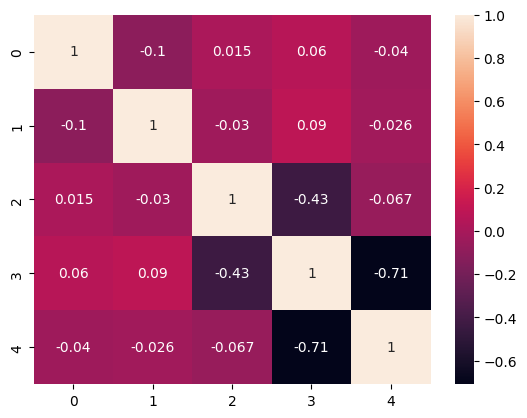

In [54]:
import seaborn as sns
ax = sns.heatmap(df2.corr(), annot=True)
ax